# Import library

In [1]:
import glob
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np
import cv2

# Data Loading

In [2]:
test = glob.glob('test_inference\*.jpg')

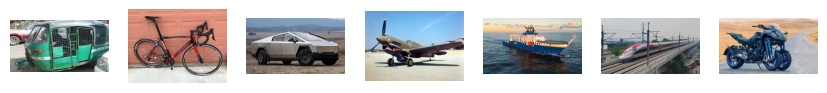

In [3]:
def show_image(image_list):
  plt.figure(figsize=(15,15))
  for i in range(len(image_list)):
    plt.subplot(1,10,i+1)
    plt.imshow(plt.imread(image_list[i]))
    plt.axis('off')
  plt.show()

show_image(test)

In [4]:
def labeling(image_list, label):
  df = pd.DataFrame()
  df['image'] = image_list
  df['label'] = label
  return df

test = labeling(test,'unknown')

# Model Loading

In [5]:
model = tf.keras.models.load_model("model_first.h5")

# Preprocessing

In [6]:
def feature_engineering(df):
  # Buat daftar kosong untuk menyimpan gambar yang telah diproses
  images = []
  # Iterasi baris pada DataFrame
  for index, row in df.iterrows():
    # Akses path gambar dari baris
    path_gambar = row['image']
    # Pastikan path_gambar adalah string
    if not isinstance(path_gambar, str):
      path_gambar = str(path_gambar)
    # Baca gambar menggunakan cv2.imread
    img = cv2.imread(path_gambar)
    # Periksa apakah gambar berhasil dimuat
    if img is not None:
      # Ubah ukuran gambar menjadi 64x64
      img = cv2.resize(img, (64, 64))
      # Ubah kedalaman gambar ke CV_8U sebelum normalisasi
      img = img.astype(np.uint8)
      # Normalisasi data gambar ke rentang [0, 1]
      img = img / 255.0
      # Ubah gambar kembali ke CV_8U setelah normalisasi
      img = (img * 255).astype(np.uint8)
      # Periksa jumlah kanal pada gambar
      if len(img.shape) == 2:
        # Ubah gambar grayscale ke RGB
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
      else:
        # Ubah gambar BGR ke RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      # Tambahkan gambar yang telah diproses ke daftar
      images.append(img)
    else:
      # Cetak pesan kesalahan jika gagal memuat gambar
      print(f"Gagal memuat gambar: {path_gambar}")
      # Tambahkan gambar kosong jika gagal memuat gambar
      images.append(np.zeros((224, 224), dtype=np.uint8))
  # Perbarui kolom 'image' dengan daftar gambar yang telah diproses
  df['image'] = images
  # Kembalikan DataFrame yang telah diproses
  return df

In [7]:
test = feature_engineering(test)

In [8]:
test

,image,label
0,"[[[126, 124, 101], [100, 98, 75], [170, 168, 1...",unknown
1,"[[[220, 145, 122], [222, 147, 124], [222, 147,...",unknown
2,"[[[121, 152, 181], [122, 151, 181], [121, 152,...",unknown
3,"[[[112, 159, 211], [108, 157, 213], [107, 159,...",unknown
4,"[[[227, 228, 215], [227, 229, 216], [228, 230,...",unknown
5,"[[[201, 205, 208], [208, 212, 216], [204, 208,...",unknown
6,"[[[247, 230, 222], [246, 229, 221], [246, 229,...",unknown


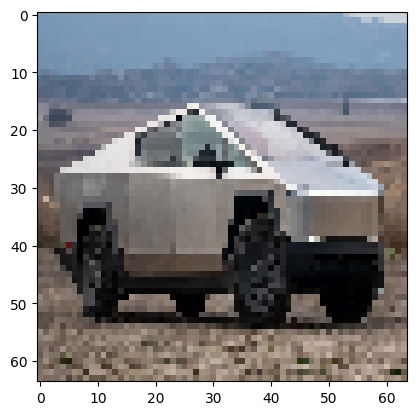

In [9]:
plt.imshow(test.iloc[2]['image'])
plt.show()

| Label Encode | Original Labels |
| --- | --- |
| 0 | Auto Rickshaws/ Bajaj |
| 1 | Bikes |
| 2 | Cars |
| 3 | Motorcycles |
| 4 | Planes |
| 5 | Ships |
| 6 | Trains |

1/1 [==============================] - 7s 7s/step
Prediction is Bajaj 


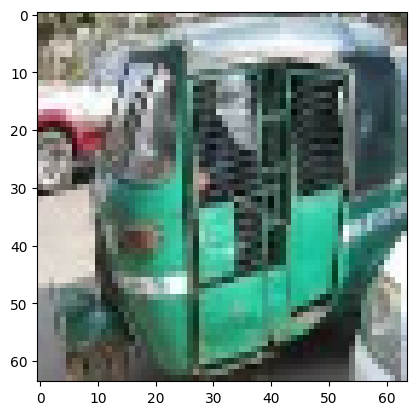

1/1 [==============================] - 0s 18ms/step
Prediction is Bike


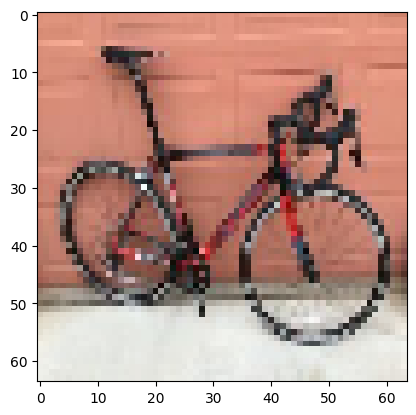

1/1 [==============================] - 0s 26ms/step
Prediction is Car


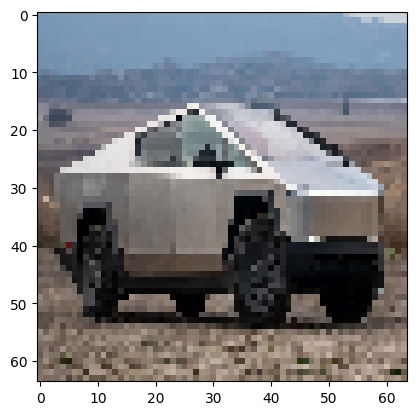

1/1 [==============================] - 0s 18ms/step
Prediction is Plane


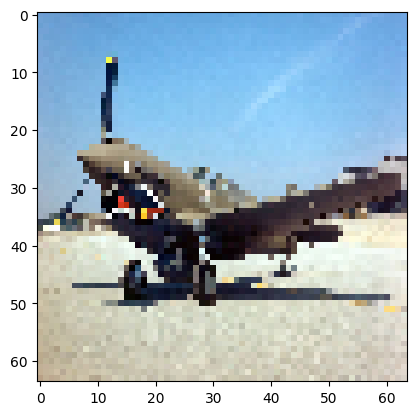

1/1 [==============================] - 0s 17ms/step
Prediction is Ship


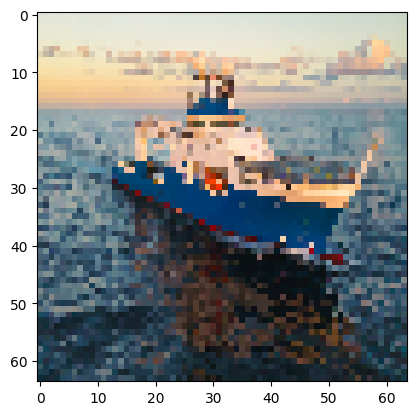

1/1 [==============================] - 0s 19ms/step
Prediction is Train


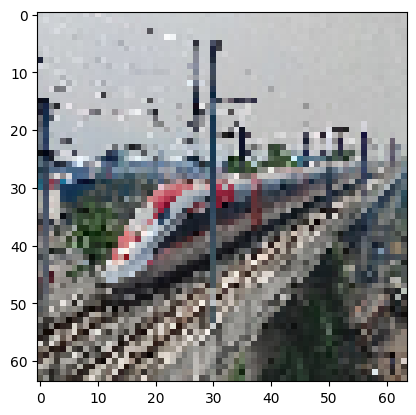

1/1 [==============================] - 0s 17ms/step
Prediction is Motorcycle


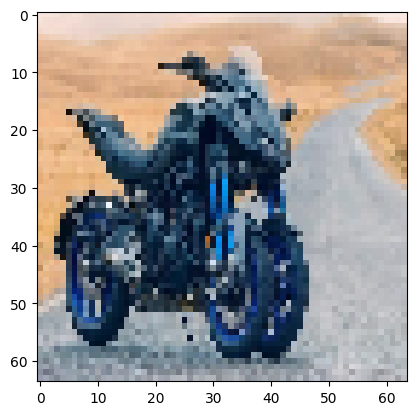

In [10]:
def predict_and_display(test_df, model):
    for index, row in test_df.iterrows():
        pred = model.predict(np.expand_dims(row['image'], axis=0))
        pred= np.argmax(pred, axis=1)
        if pred == 0:
            print("Prediction is Bajaj ")
        elif pred == 1:
            print("Prediction is Bike")
        elif pred == 2:
            print("Prediction is Car")
        elif pred == 3:
            print("Prediction is Motorcycle")
        elif pred == 4:
            print("Prediction is Plane")
        elif pred == 5:
            print("Prediction is Ship")
        elif pred == 6:
            print("Prediction is Train")
        plt.imshow(row['image'])
        plt.show()

predict_and_display(test, model)